In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path:
    sys.path.append(dir1)
os.chdir('..')

# Data preprocessing

## Imports

In [3]:
import pickle
from datetime import timedelta

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from src.utils.data_utils import split_into_samples
from src.datamodules.autoencoder.dataset import AEDataset
from src.datamodules.autoencoder.datamodule import AEDataModule

%load_ext autoreload
%autoreload 2

In [4]:
os.getcwd()

'/app'

## Data analysis

In [5]:
df_preproc = pd.read_parquet('data/new_data/preprocessed/preproc_dataset.parquet')
df_agg = pd.read_parquet('data/new_data/preprocessed/agg_dataset.parquet')

In [6]:
SAVING_DIR = os.path.join('data', 'new_data')
DATA_PATH = os.path.join('data', 'new_data', 'transactions.parquet')

In [7]:
df_transactions = pd.read_parquet(DATA_PATH)
df_transactions.head(5)

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,000932580e404dafbecd5916d4640938,5411,48,-361.07230,2020-08-03 08:05:23
1,000932580e404dafbecd5916d4640938,5499,48,-137.31398,2020-08-05 01:27:40
2,000932580e404dafbecd5916d4640938,5499,48,-138.84981,2020-08-05 03:28:11
3,000932580e404dafbecd5916d4640938,4829,48,-309.47653,2020-08-06 00:36:29
4,000932580e404dafbecd5916d4640938,5411,48,-133.47370,2020-08-09 00:30:13


In [8]:
df_transactions['transaction_dttm'] = pd.to_datetime(
            df_transactions['transaction_dttm'],
            format='%Y-%m-%d %H:%M:%S'
        )

In [68]:
test_trans = df_transactions.iloc[:300000].copy()

In [69]:
test_trans['user_id'].nunique()

348

In [70]:
split_into_samples(test_trans, len_min=20, time_delta=3)

  0%|          | 0/300000 [00:00<?, ?it/s]

In [71]:
test_trans

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,sample_label
0,000932580e404dafbecd5916d4640938,5411,48,-361.072300,2020-08-03 08:05:23,0
1,000932580e404dafbecd5916d4640938,5499,48,-137.313980,2020-08-05 01:27:40,0
2,000932580e404dafbecd5916d4640938,5499,48,-138.849810,2020-08-05 03:28:11,0
3,000932580e404dafbecd5916d4640938,4829,48,-309.476530,2020-08-06 00:36:29,0
4,000932580e404dafbecd5916d4640938,5411,48,-133.473700,2020-08-09 00:30:13,0
...,...,...,...,...,...,...
299992,03ddf5456ddc4e0ca414c491895933d5,5411,48,-437.539500,2020-10-19 07:48:15,12449
299993,03ddf5456ddc4e0ca414c491895933d5,5411,48,-144.122100,2020-10-19 09:43:42,12449
299994,03ddf5456ddc4e0ca414c491895933d5,5912,48,-30.645863,2020-10-19 10:02:18,12449
299995,03ddf5456ddc4e0ca414c491895933d5,5411,48,-414.955260,2020-10-20 06:37:39,12449


In [50]:
test_trans.groupby('sample_label')['sample_label'].count()

sample_label
0      21
1      19
2      21
3      23
4      20
       ..
416    23
417    20
418    23
419    24
420    20
Name: sample_label, Length: 411, dtype: int64

In [30]:
test_trans[test_trans['sample_label'] == 16].iloc[:40]

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,sample_label
838,000932580e404dafbecd5916d4640938,5499,48,-1273.597500,2021-07-30 01:05:49,16
839,000932580e404dafbecd5916d4640938,5411,48,-360.225950,2021-07-30 01:14:10,16
840,000932580e404dafbecd5916d4640938,5462,48,-130.767720,2021-07-30 01:44:14,16
841,000932580e404dafbecd5916d4640938,7999,48,-66.747345,2021-07-31 00:17:33,16
842,000932580e404dafbecd5916d4640938,4111,48,-23.074652,2021-07-31 01:06:32,16
843,000932580e404dafbecd5916d4640938,6011,48,-1059.120800,2021-07-31 01:11:50,16
844,000932580e404dafbecd5916d4640938,4111,48,-28.338802,2021-07-31 01:42:54,16
845,0009e36b42cb4caeb928a1e596819495,5411,48,-44.526886,2020-08-01 05:18:25,16
846,0009e36b42cb4caeb928a1e596819495,4121,48,-198.739030,2020-08-01 11:51:30,16
847,0009e36b42cb4caeb928a1e596819495,5399,48,-251.484150,2020-08-02 07:31:43,16


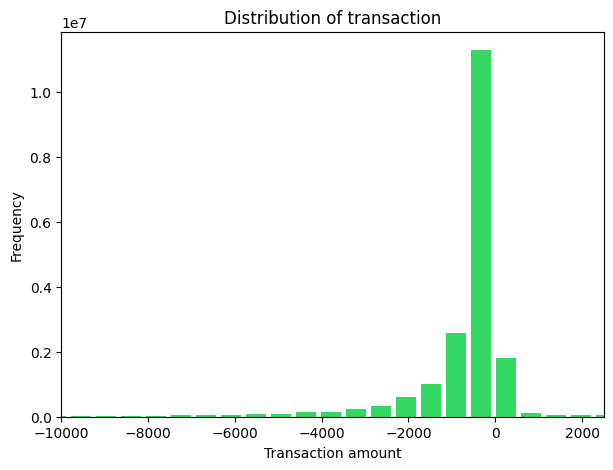

In [53]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = df_transactions['transaction_amt'].values

hist, bins = np.histogram(x, bins=1000)

freq = 10000 #500

hist[np.where(hist <= freq)] = 0

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.xlim([-10000, 2500])
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal')#'#7eb54e')
plt.title("Distribution of transaction")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency");

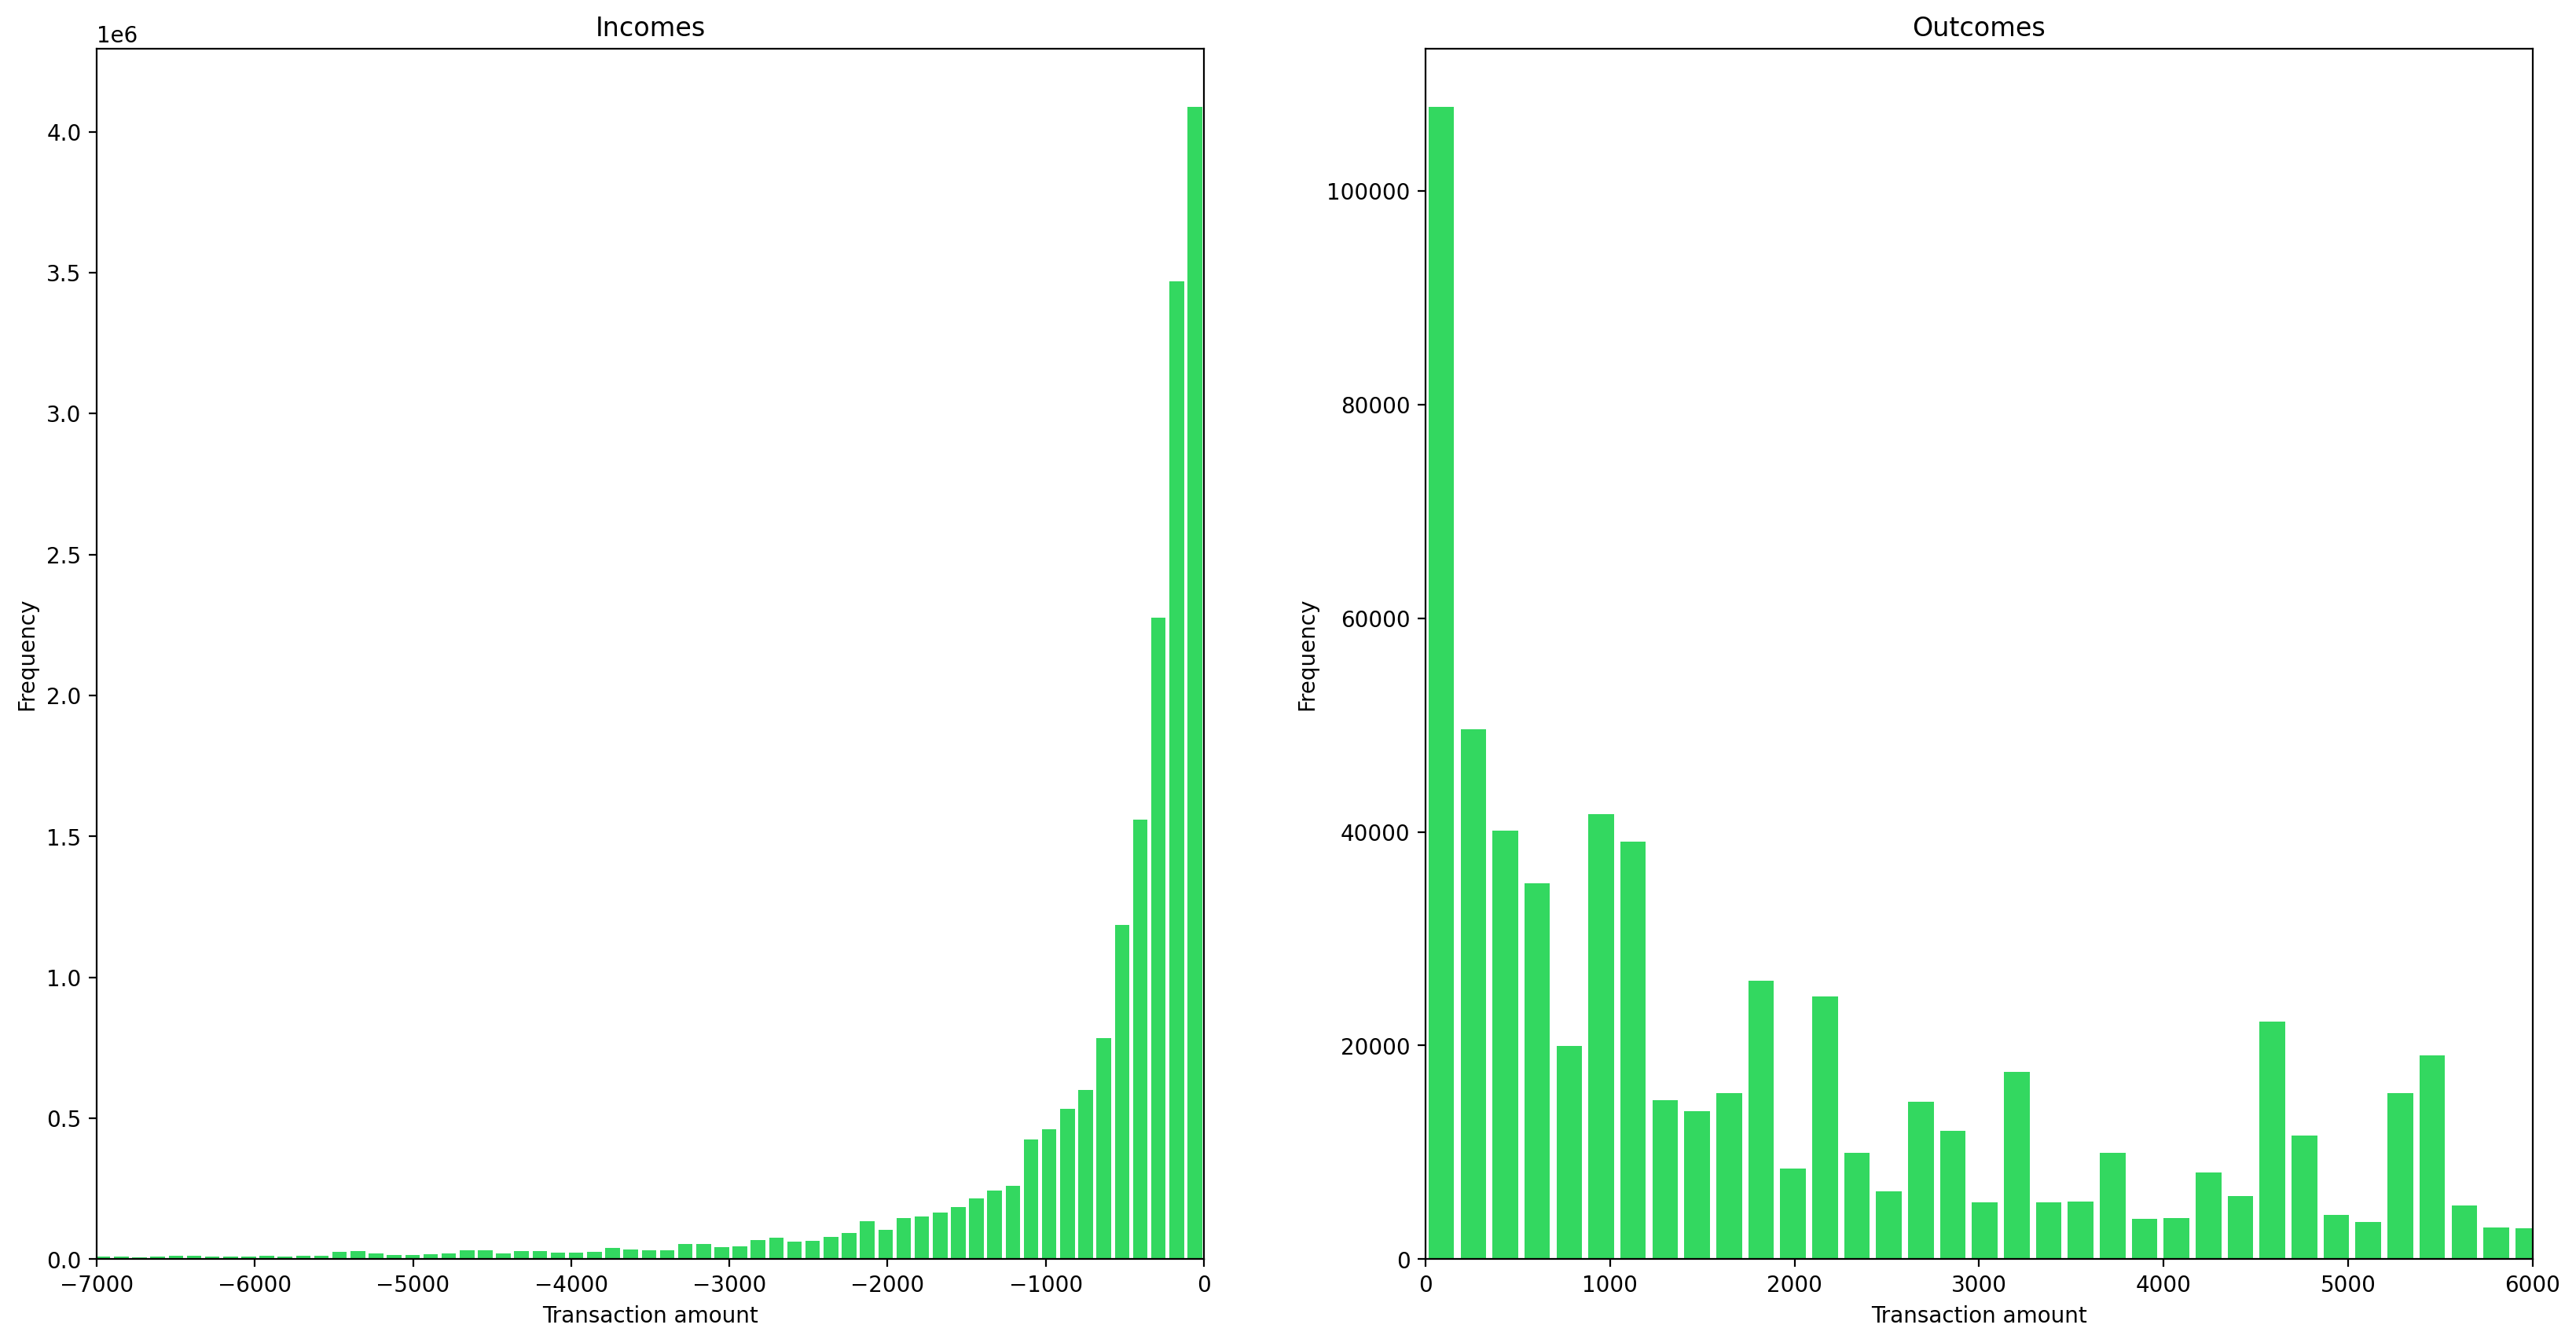

In [54]:
plt.rcParams.update({'figure.figsize':(20, 10), 'figure.dpi':200})

x = df_transactions[df_transactions['transaction_amt'] < 0]['transaction_amt'].values

hist, bins = np.histogram(x, bins=2000)

# freq = 10000 #500

# hist[np.where(hist <= freq)] = 0

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.subplot(1, 2, 1)
plt.xlim([-7000, 0])
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal')#'#7eb54e')
plt.title("Incomes")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency");

x = df_transactions[df_transactions['transaction_amt'] > 0]['transaction_amt'].values

hist, bins = np.histogram(x, bins=2000)

# freq = 10000 #500

# hist[np.where(hist <= freq)] = 0

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.subplot(1, 2, 2)
plt.xlim([0,6000])
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal')#'#7eb54e')
plt.title("Outcomes")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency");

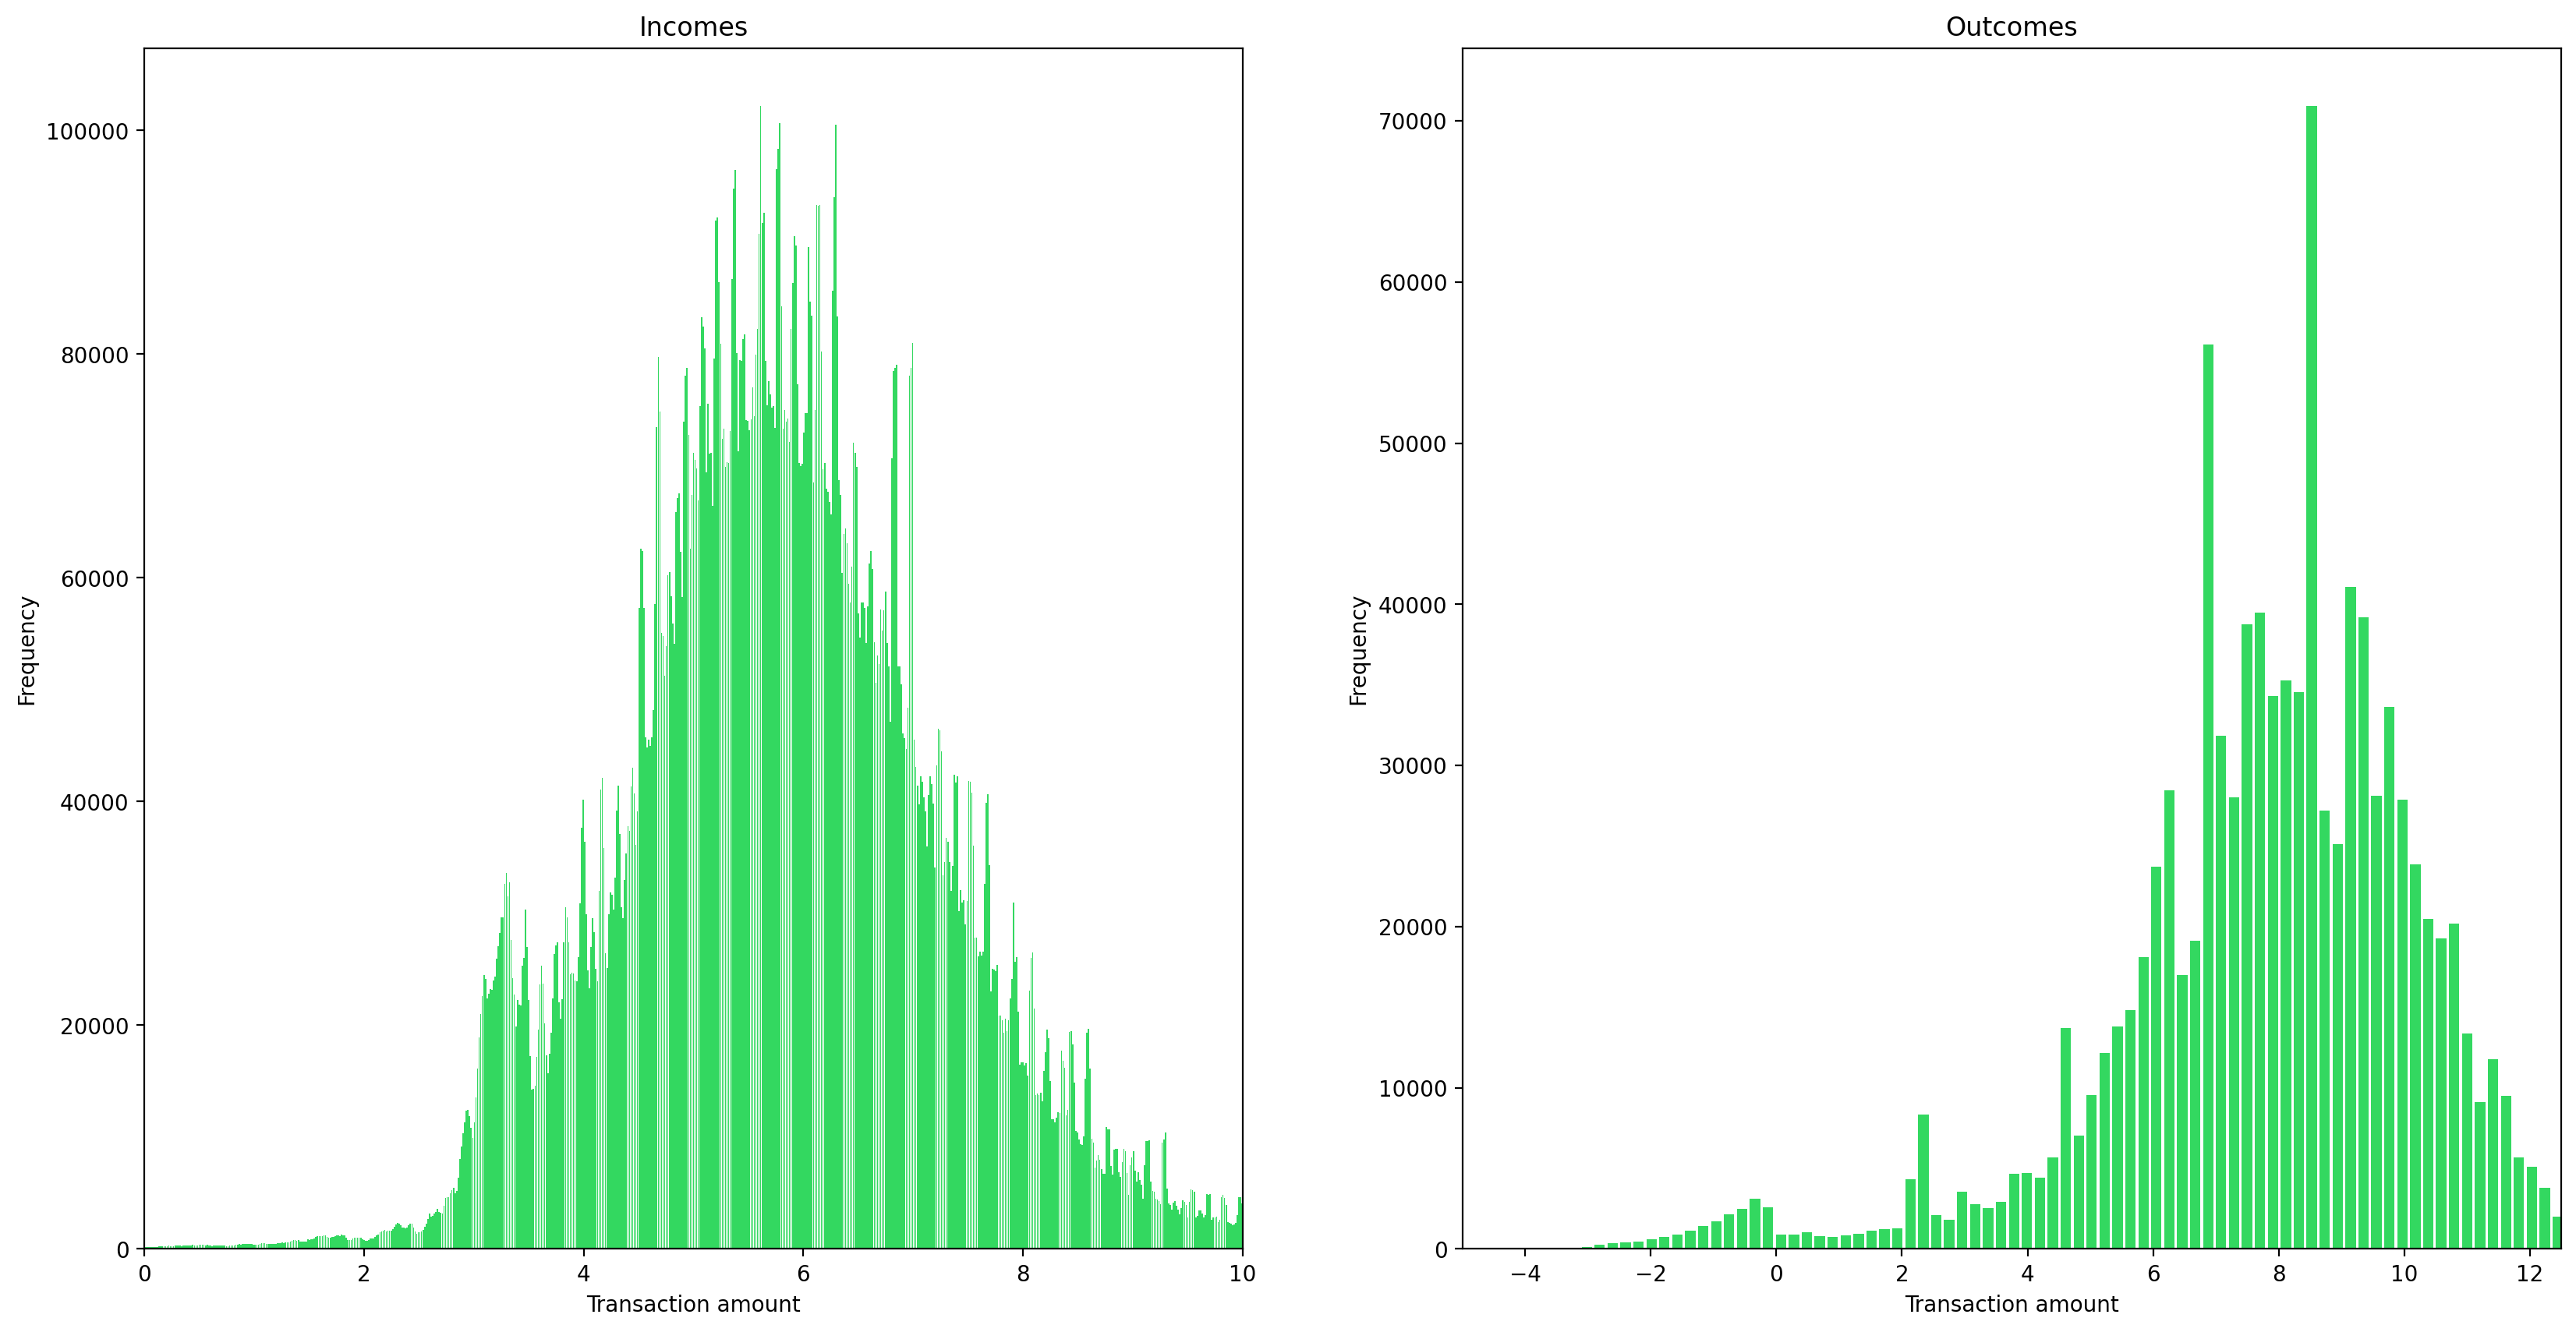

In [55]:
plt.rcParams.update({'figure.figsize':(20, 10), 'figure.dpi':200})

x = np.log(-df_transactions[df_transactions['transaction_amt'] < 0]['transaction_amt'].values)

hist, bins = np.histogram(x, bins=1500)

# freq = 10000 #500

# hist[np.where(hist <= freq)] = 0

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.subplot(1, 2, 1)
plt.xlim([0, 10])
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal')#'#7eb54e')
plt.title("Incomes")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency");

x = np.log(df_transactions[df_transactions['transaction_amt'] > 0]['transaction_amt'].values)

hist, bins = np.histogram(x, bins=100)

# freq = 10000 #500

# hist[np.where(hist <= freq)] = 0

width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.subplot(1, 2, 2)
plt.xlim([-5, 12.5])
plt.bar(center, hist, align='center', width=width, color = '#33D860', label='normal')#'#7eb54e')
plt.title("Outcomes")
plt.xlabel("Transaction amount")
plt.ylabel("Frequency");

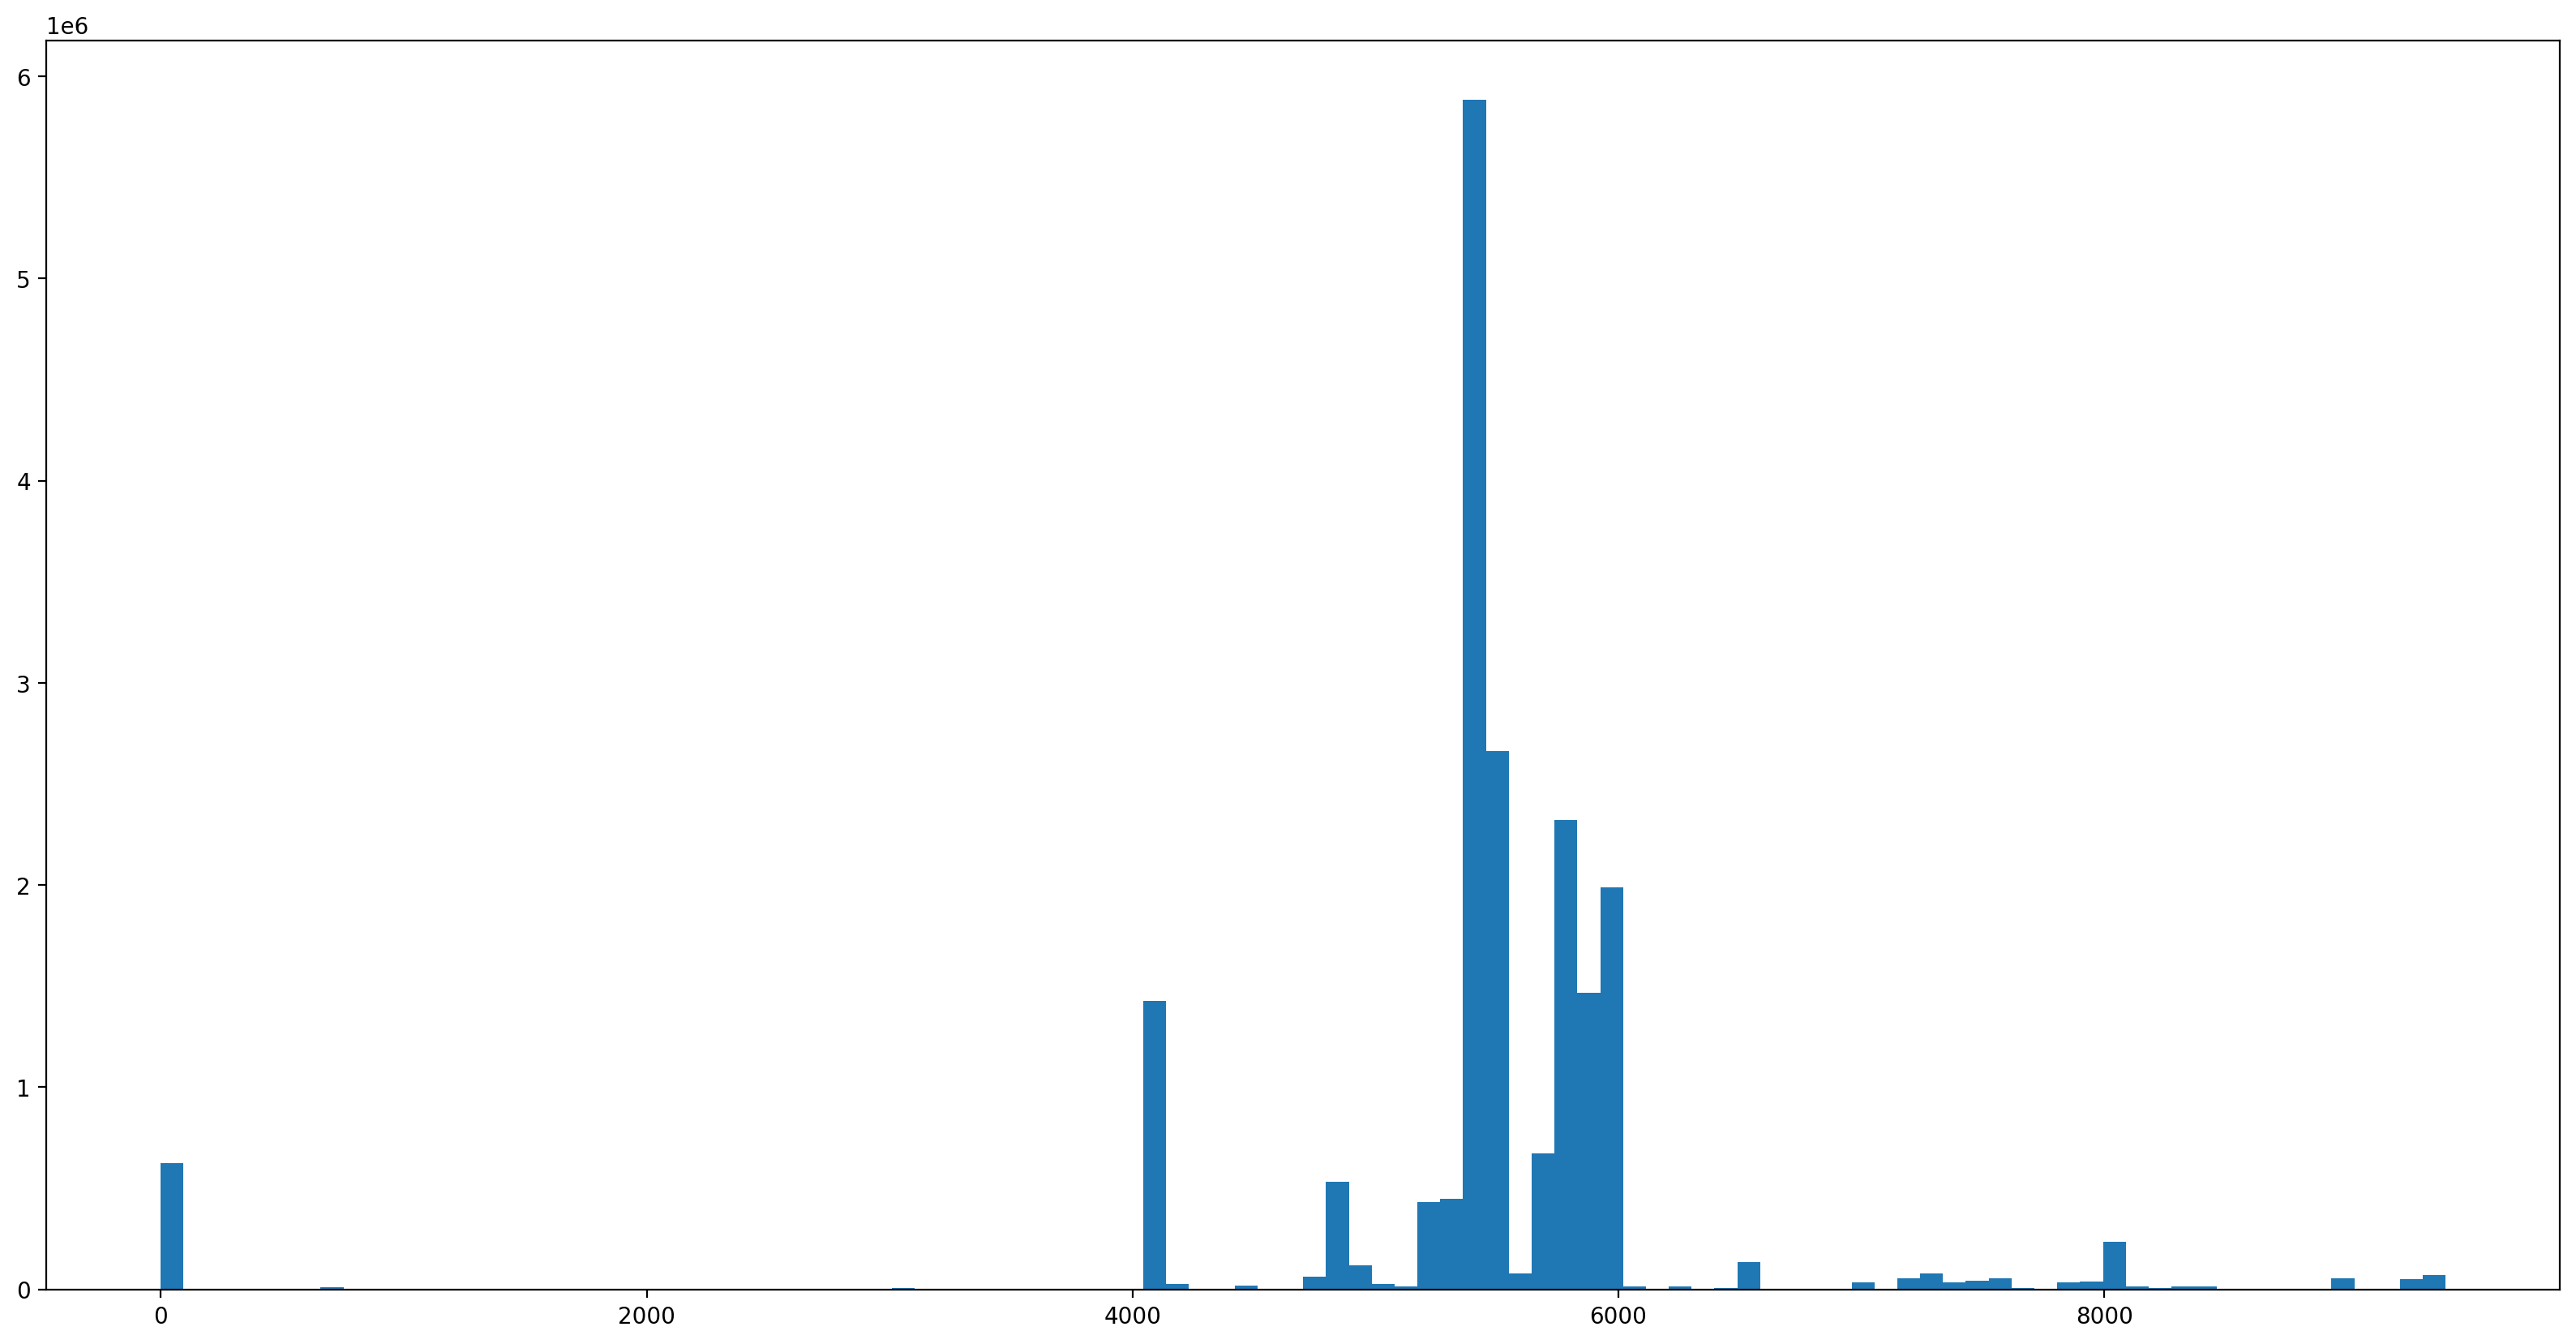

In [56]:
plt.hist(df_transactions['mcc_code'], bins=100);

In [57]:
df_transactions['currency_rk'].value_counts()

 48    19765158
-1        27405
 50       20364
 60        8983
Name: currency_rk, dtype: int64

In [58]:
df_transactions[(df_transactions['transaction_amt'] > 0)]['mcc_code'].value_counts()

-1       589319
 4829    217710
 6012     34121
 6011     31694
 5691     16686
          ...  
 9406         1
 3770         1
 7393         1
 3366         1
 8241         1
Name: mcc_code, Length: 262, dtype: int64

In [59]:
df_transactions[df_transactions['mcc_code'] == -1].count()

user_id             623291
mcc_code            623291
currency_rk         623291
transaction_amt     623291
transaction_dttm    623291
dtype: int64

In [60]:
df_transactions['mcc_code'].value_counts()

5411    5665649
5499    1740868
5814    1579958
5921     839260
6011     689507
         ...   
3771          1
3196          1
3056          1
3020          1
3405          1
Name: mcc_code, Length: 386, dtype: int64

## Data preprocessing

### Creation of the sequences

In [61]:
df_transactions['transaction_dttm'] = pd.to_datetime(
    df_transactions['transaction_dttm'],
    format='%Y-%m-%d %H:%M:%S'
)

In [62]:
df_transactions.drop(index=df_transactions[df_transactions['mcc_code'] == -1].index, axis=0, inplace=True)
df_transactions.drop(
    index=df_transactions[df_transactions['currency_rk'] != 48].index,
    axis=0,
    inplace=True
)
df_transactions.drop(columns=['currency_rk'], axis=1, inplace=True)

In [63]:
mcc2id = dict(zip(
    df_transactions['mcc_code'].unique(), 
    np.arange(df_transactions['mcc_code'].nunique()) + 1
))
df_transactions['mcc_code'] = df_transactions['mcc_code'].map(mcc2id)

In [64]:
df_transactions['is_income'] = (df_transactions['transaction_amt'] > 0).astype(np.int32)

In [65]:
df_transactions['transaction_amt'] = df_transactions[['transaction_amt', 'is_income']].apply(
    lambda t: np.log(t[0]) if t[1] else np.log(-t[0]),
    axis=1
)

In [66]:
user2id = dict(zip(
    df_transactions['user_id'].unique(), 
    np.arange(df_transactions['user_id'].nunique()) + 1
))
df_transactions['user_id'] = df_transactions['user_id'].map(user2id)

In [67]:
data_srt = df_transactions.sort_values(['user_id','transaction_dttm']).reset_index(drop=True)
data_srt.head(10)

,user_id,mcc_code,transaction_amt,transaction_dttm,is_income
0,1,1,5.889078,2020-08-03 08:05:23,0
1,1,2,4.922270,2020-08-05 01:27:40,0
2,1,2,4.933393,2020-08-05 03:28:11,0
3,1,3,5.734882,2020-08-06 00:36:29,0
4,1,1,4.893904,2020-08-09 00:30:13,0
5,1,4,4.149693,2020-08-09 01:18:28,0
6,1,5,7.402623,2020-08-09 23:43:24,0
7,1,1,7.311813,2020-08-10 03:26:58,0
8,1,4,5.176812,2020-08-24 19:28:46,0
9,1,1,4.554751,2020-08-27 01:46:31,0


In [68]:
start_user = data_srt.iloc[0]['user_id']
new_col = []
index = 0
start_time = data_srt.iloc[0]['transaction_dttm']
count = 0

for i in tqdm(range(len(data_srt))):
    cur_date = data_srt.iloc[i]['transaction_dttm']
    cur_user = data_srt.iloc[i]['user_id']
    count += 1
    if ((pd.to_datetime(cur_date)>pd.to_datetime(start_time)+timedelta(days=7))&(count>40))or(cur_user!=start_user): #suppose data is sorted
        count = 1
        index+=1
        start_time = cur_date #one_user.iloc[i]['transaction_dttm']
        start_user = cur_user
    new_col.append(index)

  0%|          | 0/19160992 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
data_srt['sample_label'] = pd.DataFrame(new_col)

data_srt['count'] = data_srt.groupby('sample_label')['sample_label'].transform('count')
data_srt = data_srt[(data_srt['count'] >= 40) & (data_srt['count'] <= 120)]
data_srt.drop(columns=['count'], inplace=True)

# Additional saving. Comment if there is no need for this.
# data_srt.to_parquet(os.path.join(SAVING_DIR, 'labeled_sequences.parquet'))

In [ ]:
# Needed for embedding layer in the model.
# Kind of hardcode, will be modified in the future.
compare_table = {}
start = 1

for mcc in data_srt['mcc_code'].unique():
    compare_table[mcc] = start
    start += 1

with open('compare_table', 'wb') as f:
    f.write(pickle.dumps(compare_table))

### Anomaly defenition

In [15]:
data_srt['anomaly'] = 0

In [117]:
def check_by_quantiles(data: pd.DataFrame):
    for mcc in tqdm(data['mcc_code'].unique()):
        pos_pos = data[(data['mcc_code'] == mcc) & (data['transaction_amt'] > 0)]['transaction_amt'].quantile(.99)
        pos_neg = data[(data['mcc_code'] == mcc) & (data['transaction_amt'] < 0)]['transaction_amt'].quantile(.1)

        answ = data[data['mcc_code'] == mcc]['transaction_amt'].apply(lambda x: int(x > pos_pos or x < pos_neg))
        data.loc[answ.index, 'anomaly'] = answ

In [119]:
check_by_quantiles()

print(f"Num of the anomalies - {data_srt['anomaly'].sum()}")

100%|██████████| 386/386 [01:53<00:00,  3.41it/s]


## Data splitting

In [ ]:
transactions_neg_scaled = StandardScaler().fit_transform(
    data_srt[data_srt['transaction_amt'] < 0]['transaction_amt'].to_numpy().reshape(-1, 1))
transactions_pos_scaled = StandardScaler().fit_transform(
    data_srt[data_srt['transaction_amt'] >= 0]['transaction_amt'].to_numpy().reshape(-1, 1))

In [ ]:
data_srt['transaction_amt_scaled'] = 0
data_srt.loc[data_srt['transaction_amt'] < 0, 'transaction_amt_scaled'] = transactions_neg_scaled
data_srt.loc[data_srt['transaction_amt'] >= 0, 'transaction_amt_scaled'] = transactions_pos_scaled

In [ ]:
sums = data_srt.groupby(['sample_label'])['anomaly'].sum()
anomaly_count = 0
normal_count = 0

if not os.path.exists(os.path.join('SAVING_DIR', 'anomaly')):
    os.mkdir(os.path.join('SAVING_DIR', 'anomaly'))

if not os.path.exists(os.path.join('SAVING_DIR', 'normal')):
    os.mkdir(os.path.join('SAVING_DIR', 'normal'))

for label in tqdm(data_srt['sample_label'].unique()):
    seq = data_srt[data_srt['sample_label'] == label][['user_id', 'mcc_code', 'transaction_amt_scaled', 'transaction_dttm']]
    anchor = pd.to_datetime(seq.iloc[0]['transaction_dttm'])
    seq['time'] = seq['transaction_dttm'].apply(lambda x: int((pd.to_datetime(x) - anchor).total_seconds()))
    seq.drop(columns=['transaction_dttm'], inplace=True)
    seq.rename(columns={'mcc_code': 'mcc', 'transaction_amt_scaled': 'amt'}, inplace=True)

    if sums.loc[label] > 0:
        seq.to_csv(os.path.join(SAVING_DIR, 'anomaly', f'{anomaly_count}.csv'), index=False)
        anomaly_count += 1
    else:
        seq.to_csv(os.path.join(SAVING_DIR, 'normal', f'{normal_count}.csv'), index=False)
        normal_count += 1

print(f'Anomaly samples - {anomaly_count}\nNormal samples - {normal_count}')

In [ ]:
pd.read_csv('data/new_data/anomaly/0.csv')